<a href="https://www.kaggle.com/code/samithsachidanandan/insurance-premium-prediction-in-python?scriptVersionId=268492512" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Import necessary libraries 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler 
from tensorflow.keras import models, layers
from sklearn.metrics import r2_score
from tensorflow.keras.callbacks import EarlyStopping



2025-10-16 14:19:20.414594: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760624360.677641      14 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760624360.747546      14 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### Loading the data 

In [2]:
df = pd.read_csv("/kaggle/input/ushealthinsurancedataset/insurance.csv")

### Basic statistics 

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [8]:
df.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [9]:
df.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

### Preprocessing 

In [10]:
df['sex'] = df['sex'].apply(lambda x : 1 if x == 'male' else 0)
df['smoker'] = df['smoker'].apply(lambda x : 1 if x == 'yes' else 0)


In [11]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [12]:
df = df.drop('region', axis=1).join(
    pd.get_dummies(df['region'].astype(str), prefix='region', dtype=int)
)

### Visualising the features

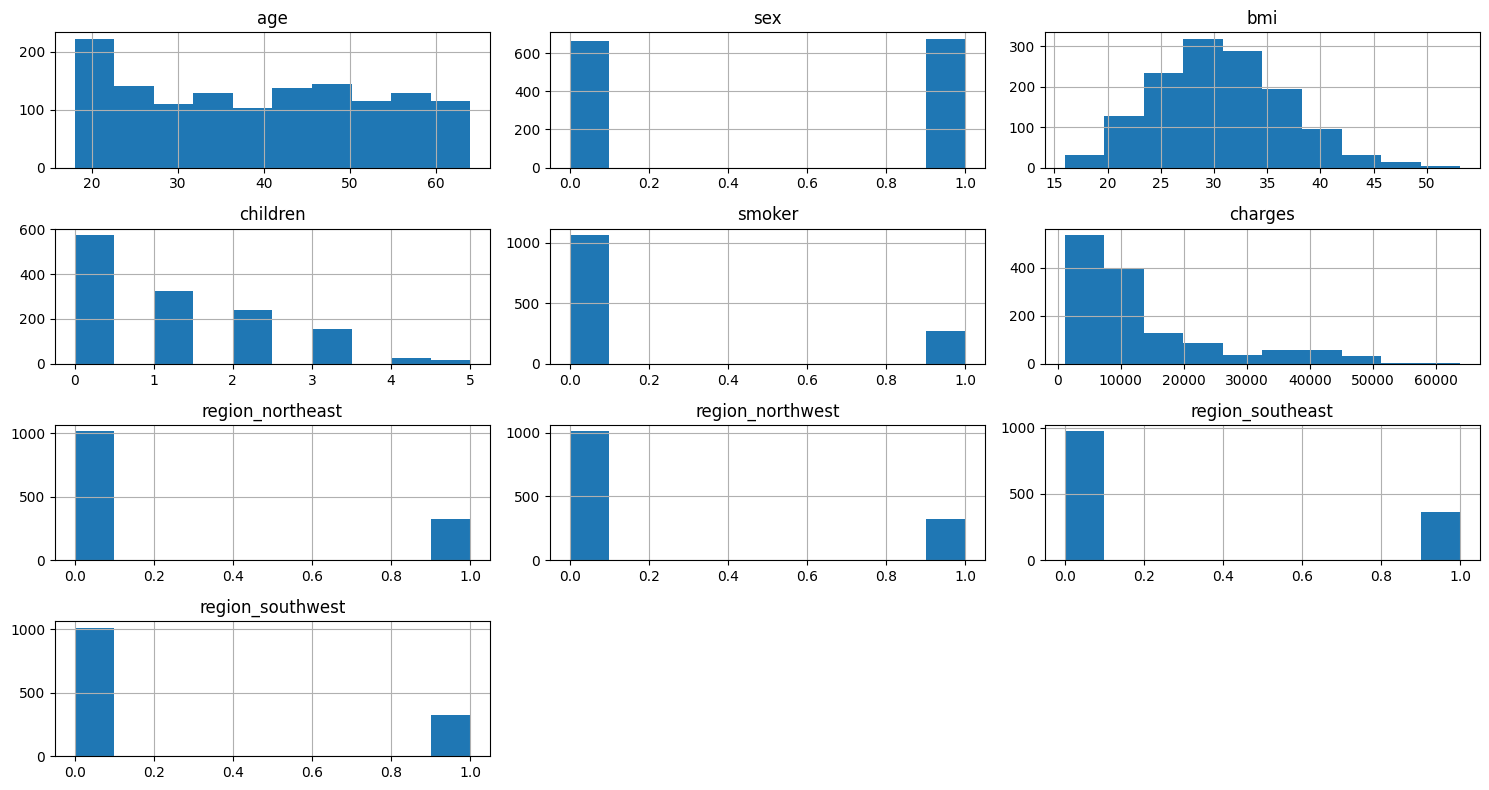

In [13]:
df.hist(figsize=(15,8))
plt.tight_layout()
plt.show()

### Correlation Matrix

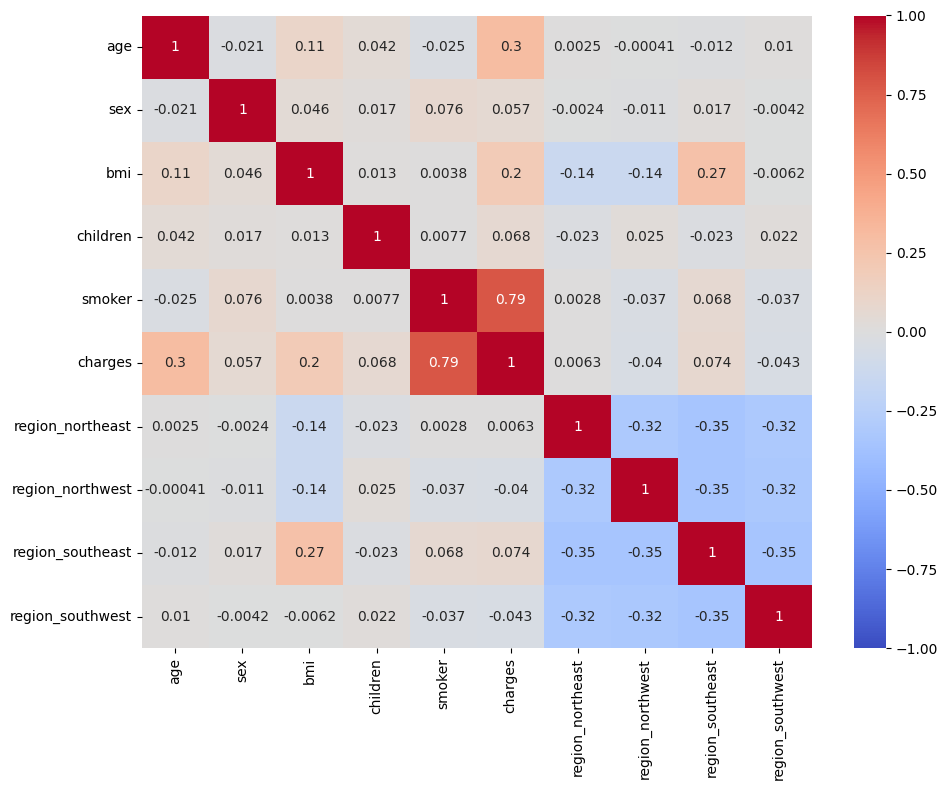

In [14]:

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.tight_layout()
plt.show()

### Train - Test split 

In [15]:
X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size= 0.2)

In [16]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [17]:
forest.score(X_test, y_test)

0.8254064127864349

In [18]:
y_pred = forest.predict(X_test)

In [19]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

4832.9845930051315

In [20]:
df.charges.std()

12110.011236693994

In [21]:
y_test.std()

11588.121309381128

In [22]:
df.charges.median()

9382.033

In [23]:
mae = mean_absolute_error(y_test, y_pred)
mae

2525.2607796020766

### Visualize the prediction 

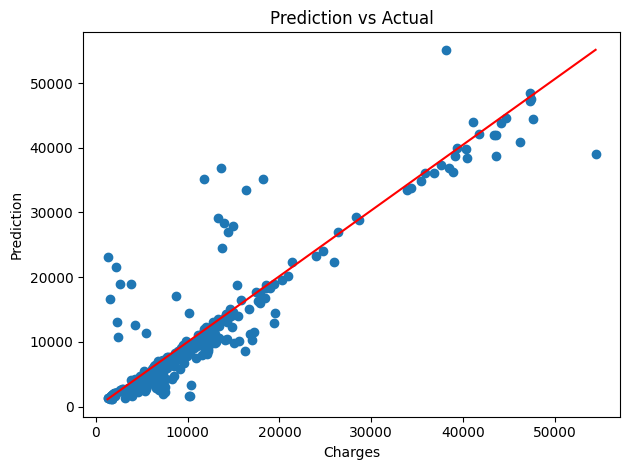

In [24]:
plt.scatter(y_pred, y_test)
plt.plot(np.linspace(y_pred.min(), y_pred.max()), np.linspace(y_test.min(),y_test.max()),color='red')
plt.xlabel('Charges')
plt.ylabel('Prediction')
plt.title('Prediction vs Actual')
plt.tight_layout()
plt.show()

In [25]:
feature_importances = sorted( zip(forest.feature_names_in_, forest.feature_importances_),key=lambda x : x[1], reverse=True)

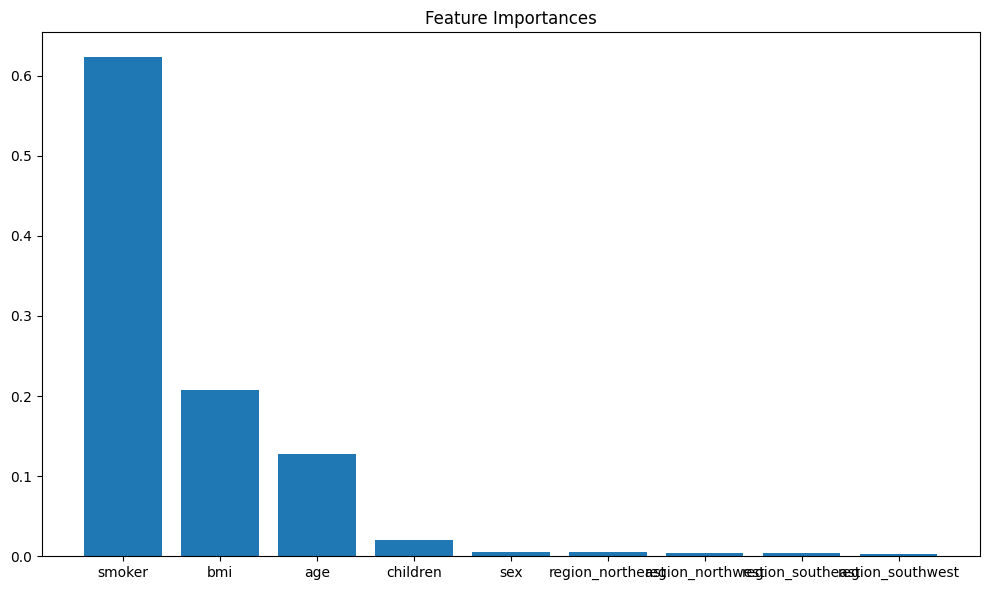

In [26]:
plt.figure(figsize=(10,6))
plt.bar([x[0] for x in feature_importances ],[x[1] for x in feature_importances])
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

### Hypertunning for random forest

In [27]:
param_grid = {
    'max_depth' : [None, 2,5,8,10],
    'min_samples_split': [6,10,12,18],
    'min_samples_leaf' : [4,6,8,10]
    
}

forest = RandomForestRegressor(n_jobs=-1)

grid_search = GridSearchCV(forest, param_grid, cv=5)

grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'max_depth': [None, 2, 5, 8, 10],
                         'min_samples_leaf': [4, 6, 8, 10],
                         'min_samples_split': [6, 10, 12, 18]})

In [28]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 12}

In [29]:
forest = grid_search.best_estimator_

In [30]:
forest

RandomForestRegressor(max_depth=5, min_samples_leaf=10, min_samples_split=12,
                      n_jobs=-1)

In [31]:
forest.score(X_test, y_test)

0.8451346712667505

In [32]:
y_pred = forest.predict(X_test)

In [33]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

4551.749634149327

In [34]:
mae = mean_absolute_error(y_test, y_pred)
mae

2482.803970173149

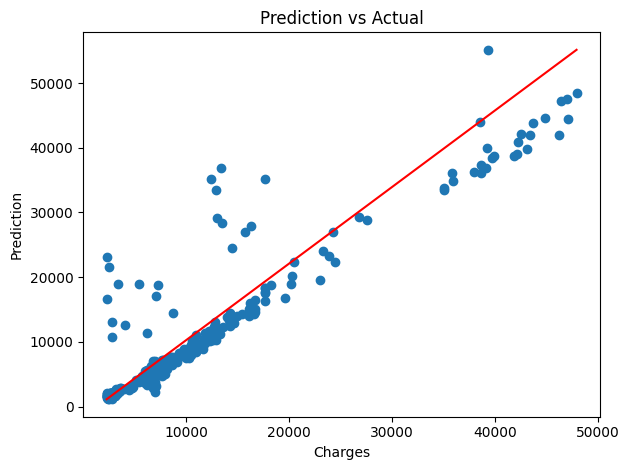

In [35]:
plt.scatter(y_pred, y_test)
plt.plot(np.linspace(y_pred.min(), y_pred.max()), np.linspace(y_test.min(),y_test.max()),color='red')
plt.xlabel('Charges')
plt.ylabel('Prediction')
plt.title('Prediction vs Actual')
plt.tight_layout()
plt.show()

### XGBoost

In [36]:
xgb_reg  = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [37]:
xgb_reg.score(X_test, y_test)

0.7916499415487308

In [38]:
y_pred = xgb_reg.predict(X_test)

In [39]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

5279.564256036331

In [40]:
mae = mean_absolute_error(y_test, y_pred)
mae

2895.3400171416315

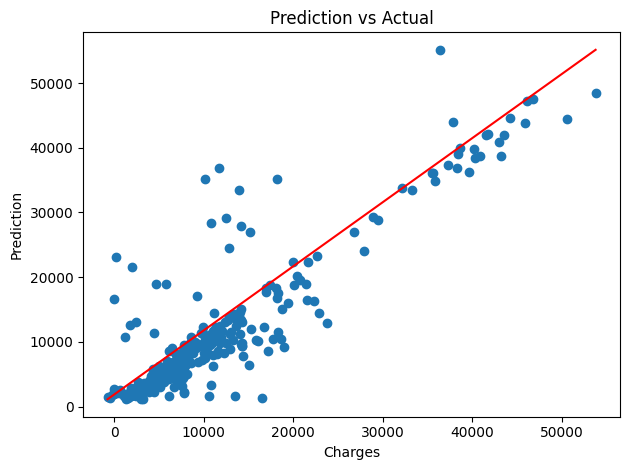

In [41]:
plt.scatter(y_pred, y_test)
plt.plot(np.linspace(y_pred.min(), y_pred.max()), np.linspace(y_test.min(),y_test.max()),color='red')
plt.xlabel('Charges')
plt.ylabel('Prediction')
plt.title('Prediction vs Actual')
plt.tight_layout()
plt.show()

### Hypertunning for XGBoost 

In [42]:
param_grid = {
    'max_depth': [2, 5, 8, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'learning_rate': [0.01, 0.05, 0.1]
}

xgb_reg = xgb.XGBRegressor(
    n_estimators=500,
    objective='reg:squarederror',
    n_jobs=-1,
    random_state=42
)

grid_search = GridSearchCV(
    estimator=xgb_reg,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error', 
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=500,
                                    n_jobs=-1, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [2, 5, 8, 10],
                         'min_child_weight': [1, 3, 5],
                         'subsample': [0.8, 1.0]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [43]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.01,
 'max_depth': 2,
 'min_child_weight': 5,
 'subsample': 0.8}

In [44]:
xgb_reg = grid_search.best_estimator_

In [45]:
xgb_reg

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [46]:
xgb_reg.score(X_test, y_test)

0.8416903137053608

In [47]:
y_pred = xgb_reg.predict(X_test)

In [48]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

4602.08897351154

In [49]:
mae = mean_absolute_error(y_test, y_pred)
mae

2667.1638123758166

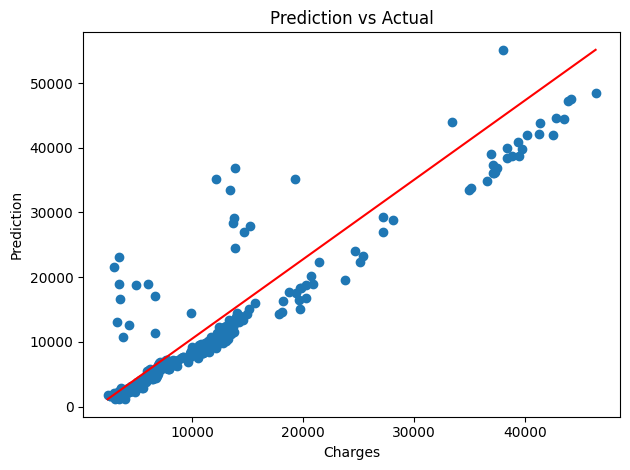

In [50]:
plt.scatter(y_pred, y_test)
plt.plot(np.linspace(y_pred.min(), y_pred.max()), np.linspace(y_test.min(),y_test.max()),color='red')
plt.xlabel('Charges')
plt.ylabel('Prediction')
plt.title('Prediction vs Actual')
plt.tight_layout()
plt.show()

### Linear Regression

In [51]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
lr_reg  = LinearRegression()
lr_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [53]:
lr_reg.score(X_test_scaled, y_test)

0.7276347421113507

In [54]:
y_pred = lr_reg.predict(X_test_scaled)

In [55]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

6036.387642016008

In [56]:
mae = mean_absolute_error(y_test, y_pred)
mae

4129.397860539319

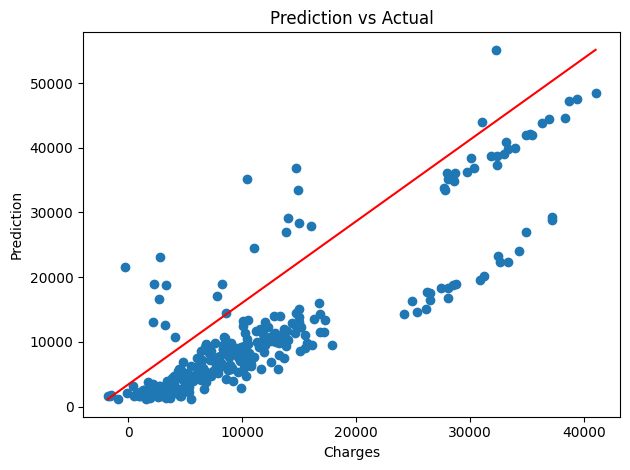

In [57]:
plt.scatter(y_pred, y_test)
plt.plot(np.linspace(y_pred.min(), y_pred.max()), np.linspace(y_test.min(),y_test.max()),color='red')
plt.xlabel('Charges')
plt.ylabel('Prediction')
plt.title('Prediction vs Actual')
plt.tight_layout()
plt.show()

In [58]:


input_dim = X_train_scaled.shape[1]
num_classes = len(np.unique(y_train))

model = models.Sequential([
    layers.Dense(64, input_shape=(input_dim,)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.4),

    layers.Dense(64),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.4),

    layers.Dense(64),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.3),

    layers.Dense(32, activation='relu'),
    layers.Dense(1) 
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

history = model.fit(X_train_scaled, y_train,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=16,
                    callbacks=[early_stop])

model.summary()

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-10-16 14:23:03.371537: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 373723360.0000 - mae: 14473.2734 - val_loss: 261258960.0000 - val_mae: 11866.0068
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 299250720.0000 - mae: 12968.7246 - val_loss: 260954048.0000 - val_mae: 11858.6973
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 328149408.0000 - mae: 13421.9902 - val_loss: 259227440.0000 - val_mae: 11831.7822
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 355369312.0000 - mae: 14089.1602 - val_loss: 255858912.0000 - val_mae: 11783.3828
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 364597568.0000 - mae: 14339.5703 - val_loss: 251718576.0000 - val_mae: 11719.7324
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 324509472.0000 - mae: 13297.7871 - val_loss: 247365920.0000 - val_mae: 11646.6074
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 345114048.0000 - mae: 13962.2266 - val_loss: 241387888.0000 - val_mae: 11536.9805
Epoch 8/100
54/54 ━━━━━━

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,757 (135.77 KB)

 Trainable params: 11,457 (44.75 KB)

 Non-trainable params: 384 (1.50 KB)

 Optimizer params: 22,916 (89.52 KB)

In [59]:


y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
R² Score: 0.818731535535555


In [60]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

4924.502865763345

In [61]:
mae = mean_absolute_error(y_test, y_pred)
mae

2690.6804684858907

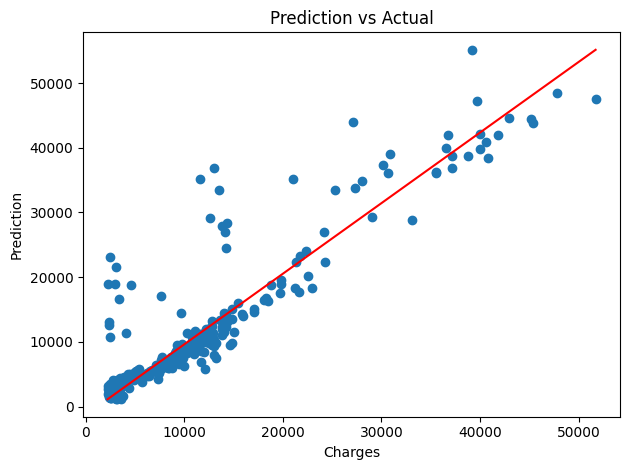

In [62]:
plt.scatter(y_pred, y_test)
plt.plot(np.linspace(y_pred.min(), y_pred.max()), np.linspace(y_test.min(),y_test.max()),color='red')
plt.xlabel('Charges')
plt.ylabel('Prediction')
plt.title('Prediction vs Actual')
plt.tight_layout()
plt.show()